In [15]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from algorithms import globals
import os

In [16]:
def plot_function(curr_f):
    x = np.linspace(globals.def_clamps[0], globals.def_clamps[1], 100)
    y = np.linspace(globals.def_clamps[0], globals.def_clamps[1], 100)
    X, Y = np.meshgrid(x, y)
    objecitve_f = curr_f["func"](ndim=2)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = objecitve_f.evaluate([X[i, j], Y[i, j]])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    ax.set_title(f"{curr_f['shortname']}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X,Y)')

    plt.show()


In [17]:
logs = [
    { "name" : "Adam norm lr=0.001 B1=0.8 B2=0.99", "path": "./Adam/adam_logs_norm_lr=0.001_B1=0.8_B2=0.99/adam_records_", "run_path": "./Adam/adam_logs_norm_lr=0.001_B1=0.8_B2=0.99/adam_run_records_"},
    { "name" : "Adam norm lr=0.01 B1=0.8 B2=0.99", "path": "./Adam/adam_logs_norm_lr=0.01_B1=0.8_B2=0.99/adam_records_", "run_path": "./Adam/adam_logs_norm_lr=0.01_B1=0.8_B2=0.99/adam_run_records_"},
    { "name" : "Adam lr=0.01 B1=0.9 B2=0.999", "path": "./Adam/adam_logs_lr=0.01/adam_records_", "run_path": "./Adam/adam_logs_lr=0.01/adam_run_records_"},
    { "name" : "Adam norm lr=0.01 B1=0.9 B2=0.999", "path": "./Adam/adam_logs_norm_lr=0.01/adam_records_", "run_path": "./Adam/adam_logs_norm_lr=0.01/adam_run_records_"},
    { "name" : "Adam norm lr=0.001 B1=0.9 B2=0.999", "path": "./Adam/adam_logs_norm_lr=0.001/adam_records_", "run_path": "./Adam/adam_logs_norm_lr=0.001/adam_run_records_"},
    { "name" : "CMAES", "path": "./CMAES/cmaes_logs/cmaes_records_", "run_path": "./CMAES/cmaes_logs/cmaes_run_records_"},
]

In [18]:
def get_records(path):

    if not os.path.exists(path):
        records = None
    else:
        records = []
        with open(path, mode='r', newline='') as file:
            reader = csv.DictReader(file)
            for row in reader:
                converted_row = {
                    key: (float(value.strip('[]')) if key != 'function' else value)
                    for key, value in row.items()
                }
                records.append(converted_row)

    return records


In [19]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

In [20]:
def compare(logs):
    for curr_f in globals.CEC2013:
        plot_function(curr_f)

        run_records_by_method = {}
        records_by_method = {}

        for method in logs:
            records_by_method[method['name']] = get_records( f"{method['path']}{curr_f['shortname']}.csv")
            run_records_by_method[method['name']] = get_records( f"{method['run_path']}{curr_f['shortname']}.csv")

        fig, axs = plt.subplots(2, 3, figsize=(20, 12))
        axs = axs.flatten()

        plot_idx = 0

        # ECDF
        for dim in globals.def_dimensions:
            ax = axs[plot_idx]
            for method_name, run_records in run_records_by_method.items():
                if run_records is None:
                    continue
                errors = [r['error'] for r in run_records if r['dimension'] == dim]
                if not errors:
                    continue
                x, y = ecdf(errors)
                ax.step(x, y, where='post', label=method_name)

            ax.set_xlabel('Error')
            ax.set_ylabel('ECDF')
            ax.set_title(f"{curr_f['shortname']}, ECDF, dim={dim}")
            ax.set_xscale('log')
            ax.legend()
            ax.grid(True)

            plot_idx += 1

        # Mean + Std
        for dim in globals.def_dimensions:
            ax = axs[plot_idx]
            for method_name, records in records_by_method.items():
                means = []
                stds = []

                for checkpoint in globals.def_checkpoints:
                    if records:
                        mean_vals = [r['mean'] for r in records if r['dimensions'] == dim and r['checkpoint'] == checkpoint]
                        std_vals = [r['std'] for r in records if r['dimensions'] == dim and r['checkpoint'] == checkpoint]
                        means.append(np.mean(mean_vals) if mean_vals else 0)
                        stds.append(np.mean(std_vals) if std_vals else 0)
                    else:
                        means.append(0)
                        stds.append(0)

                ax.plot(globals.def_checkpoints, means, label=method_name, marker='o')
                ax.fill_between(globals.def_checkpoints,
                                np.array(means) - np.array(stds),
                                np.array(means) + np.array(stds),
                                alpha=0.2)

            ax.set_xlabel('Checkpoint')
            ax.set_ylabel('Error')
            ax.set_title(f"{curr_f['shortname']}, mean and std, dim={dim}")
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.legend()
            ax.grid(True)

            plot_idx += 1

        plt.tight_layout()
        plt.show()


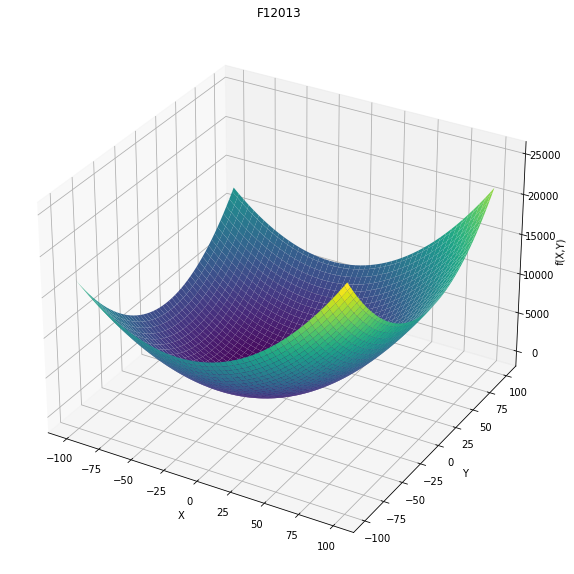

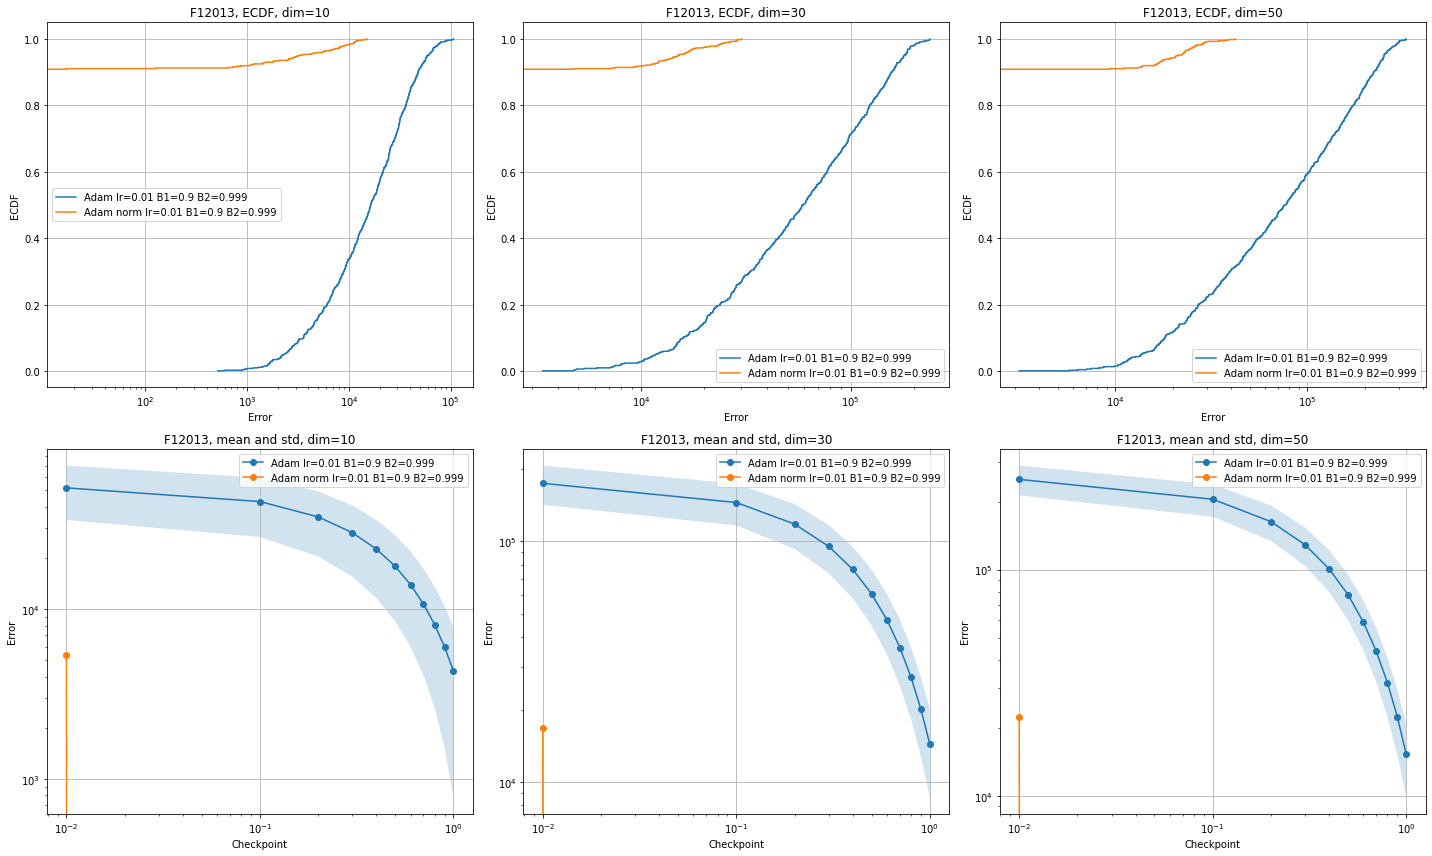

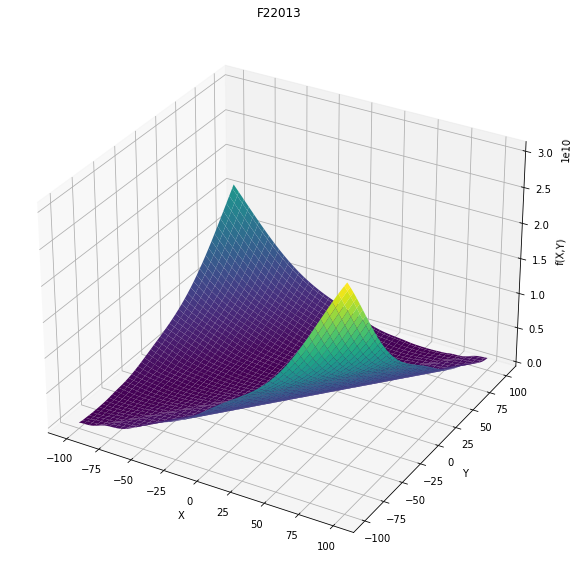

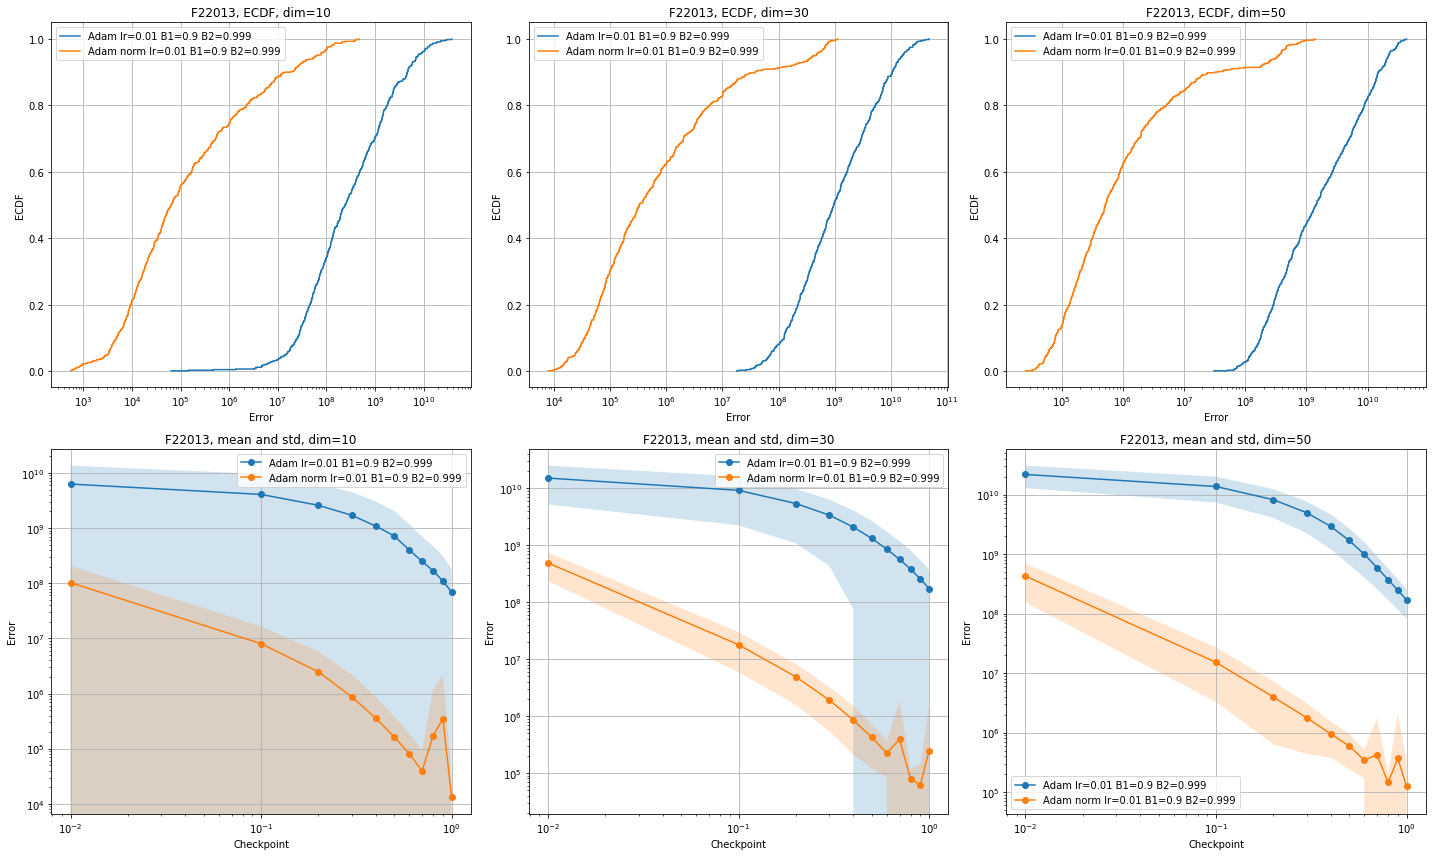

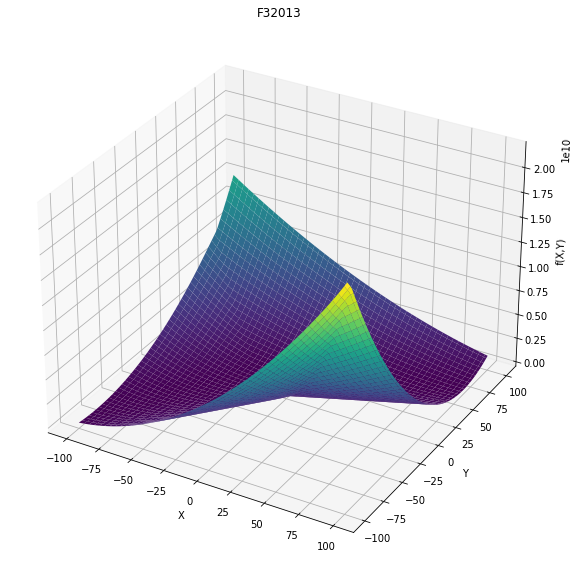

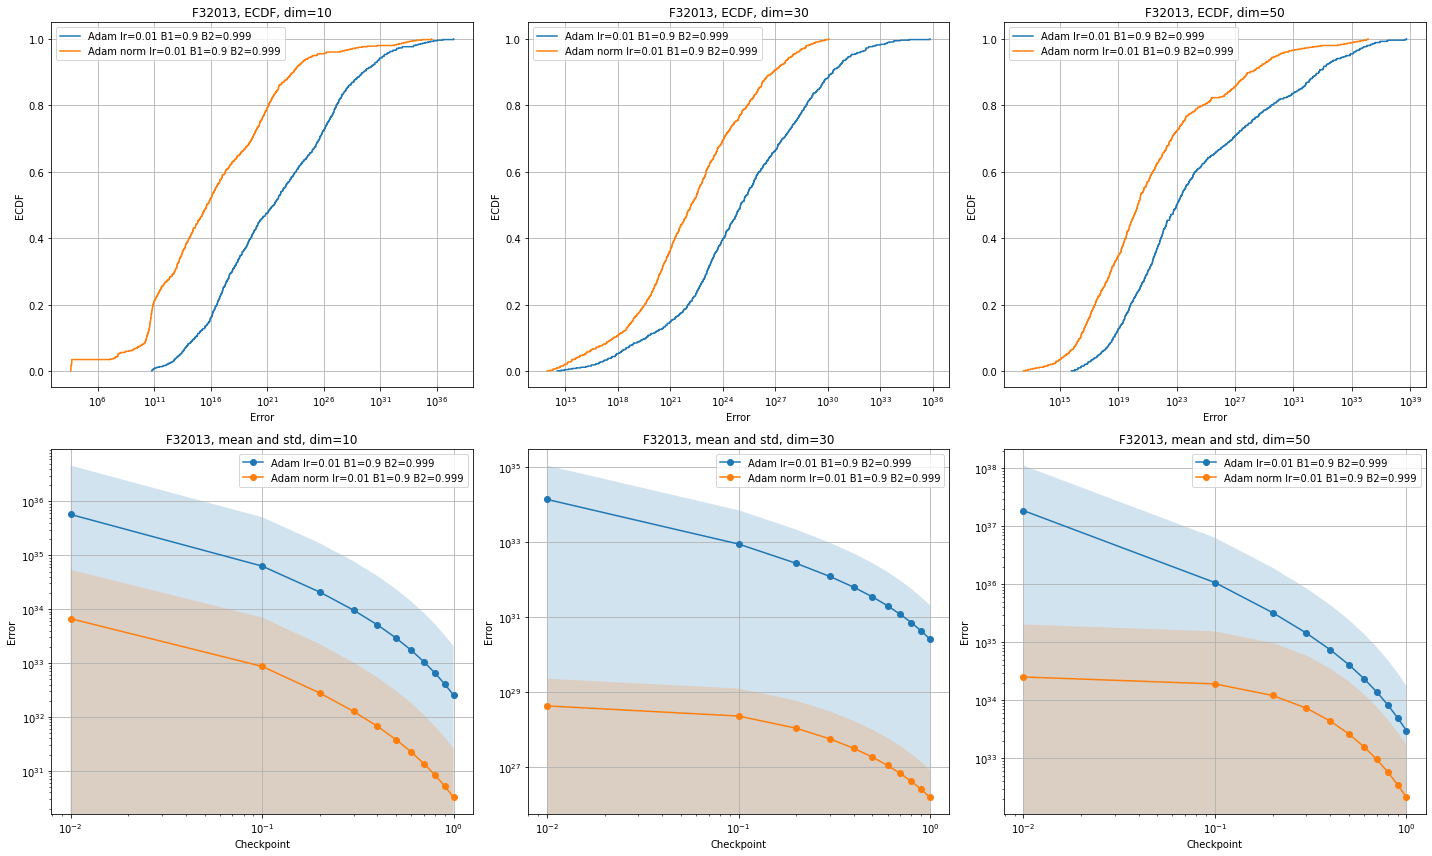

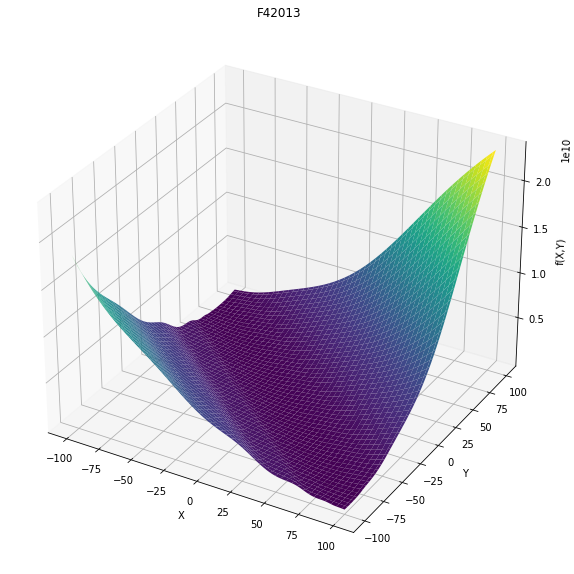

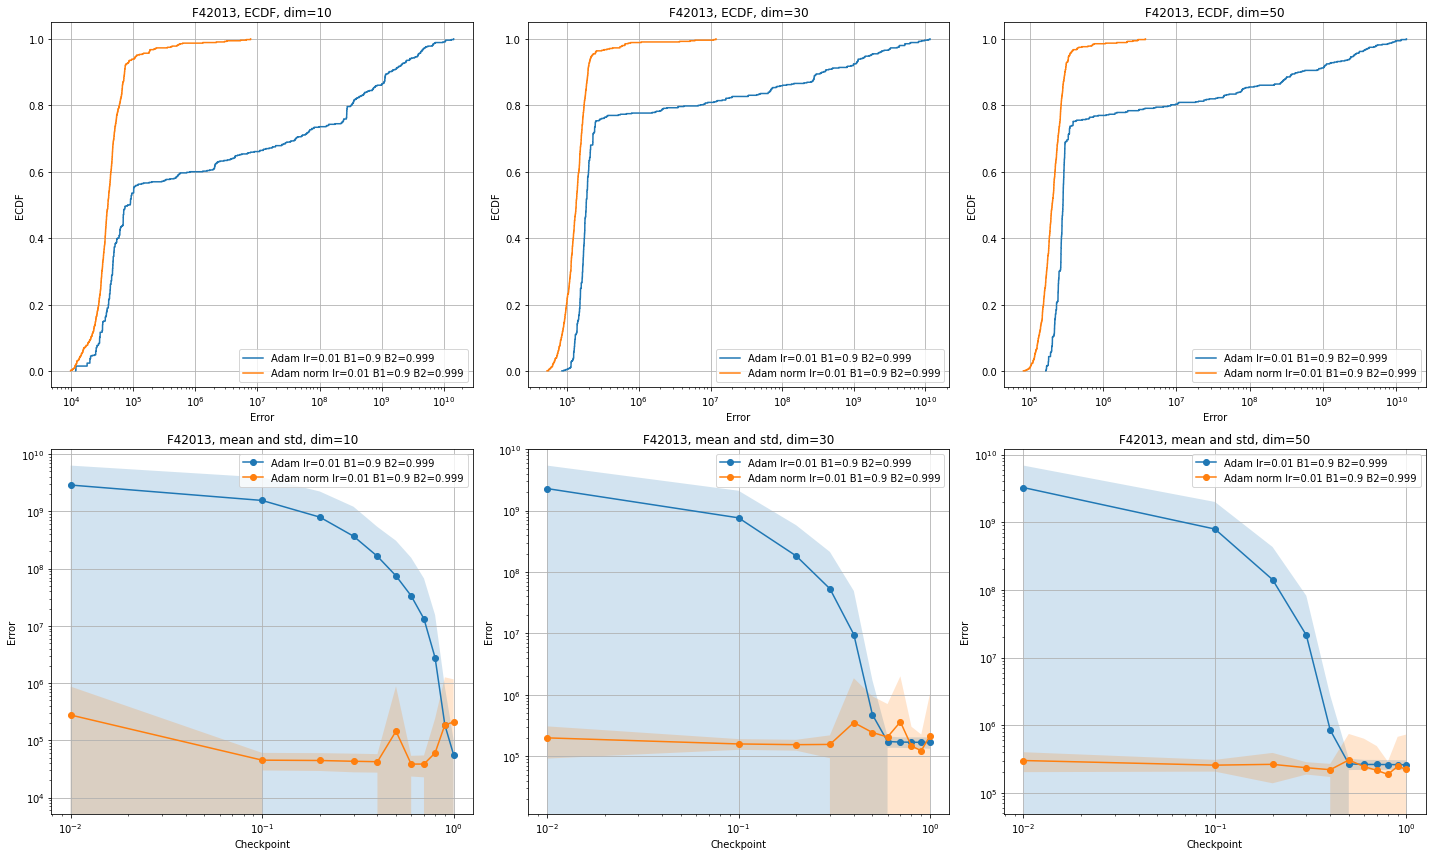

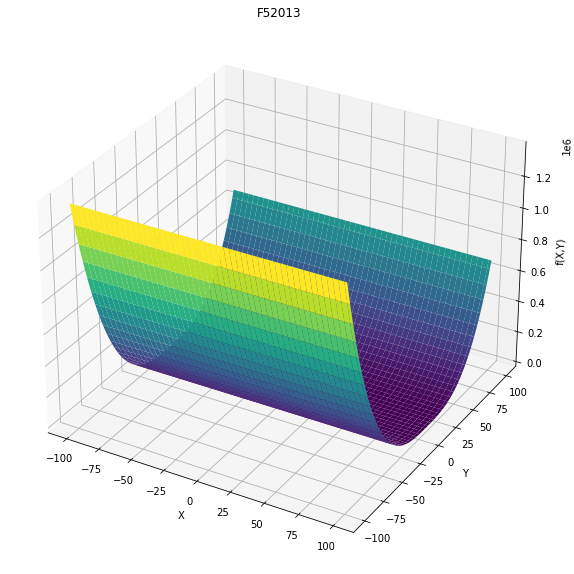

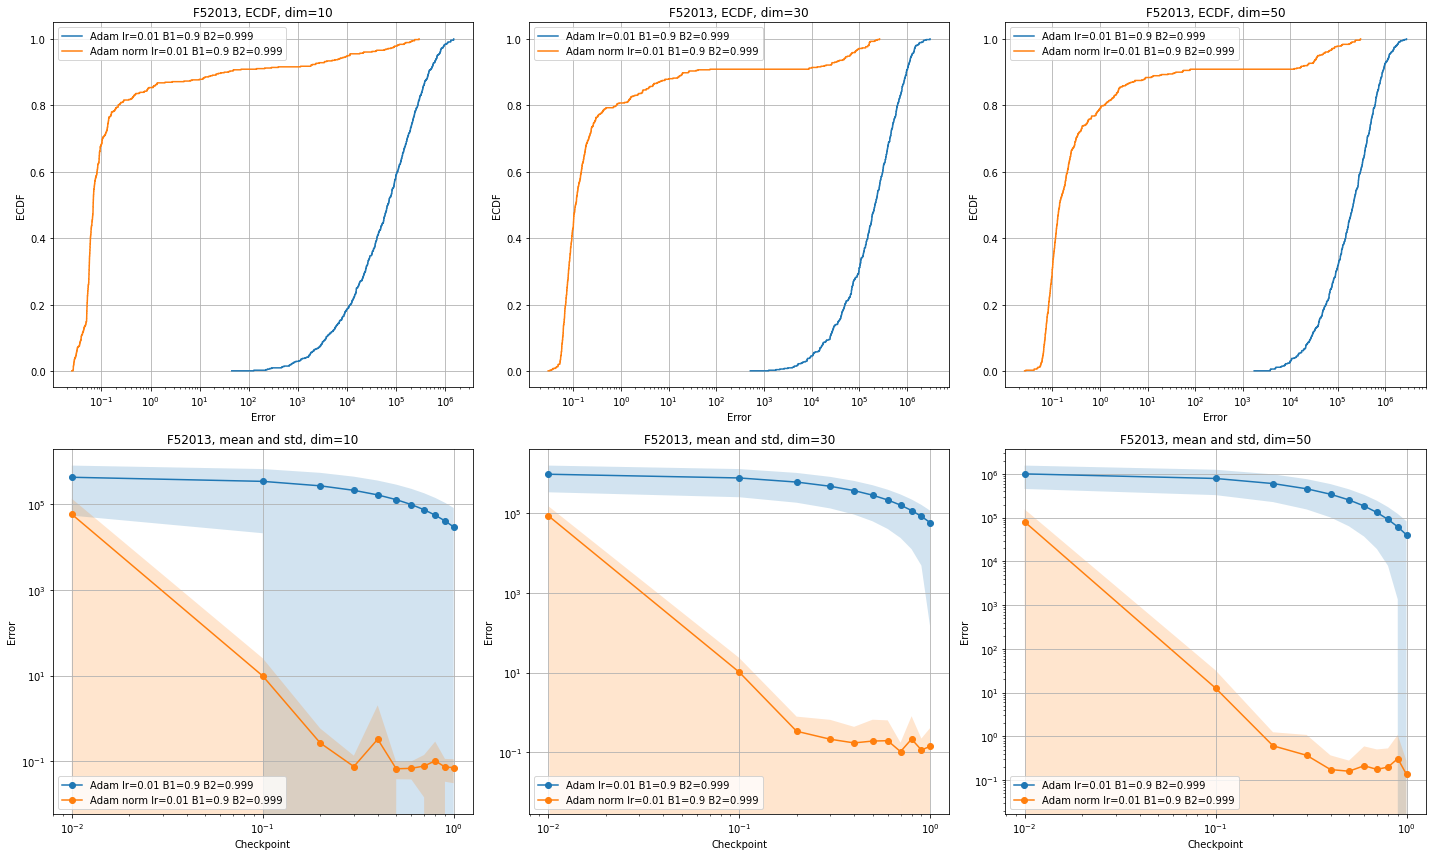

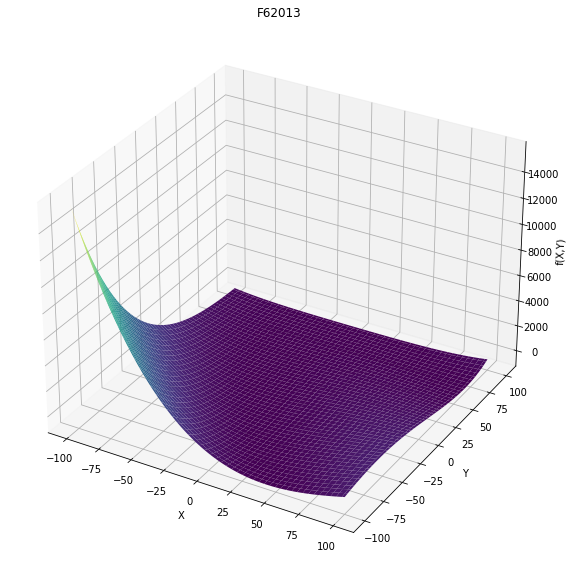

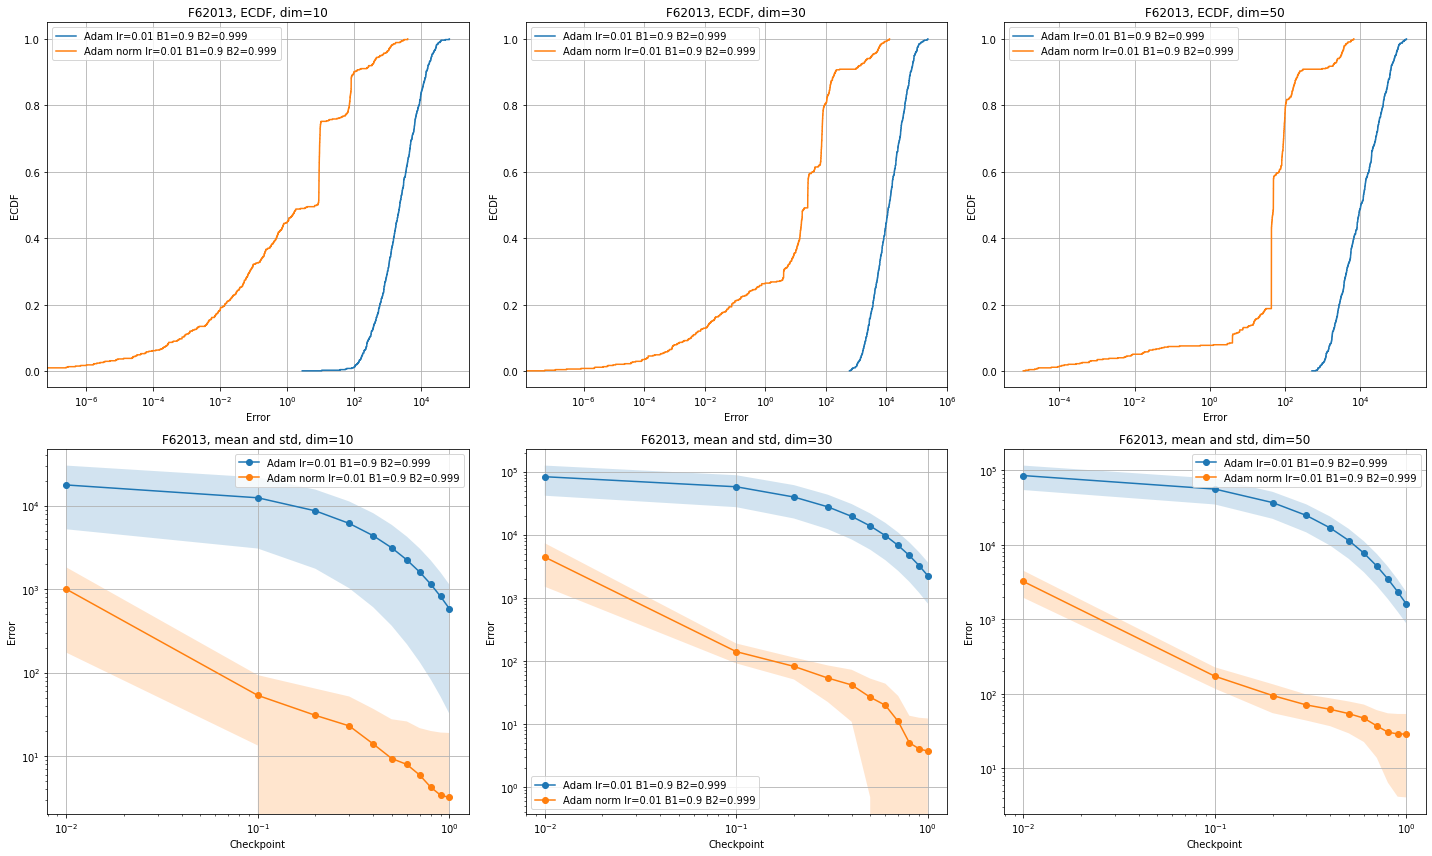

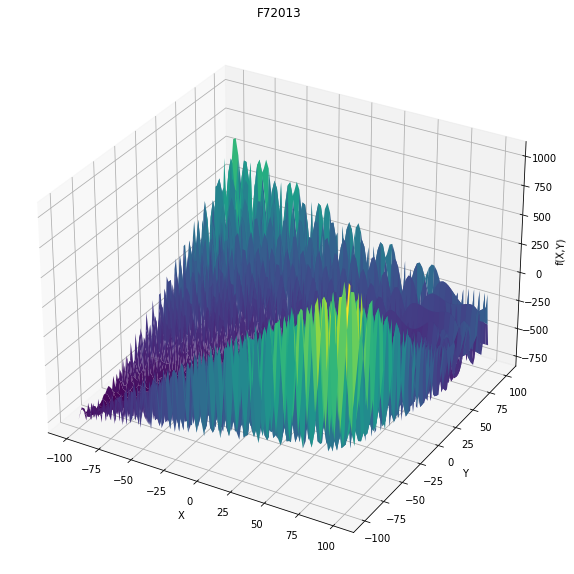

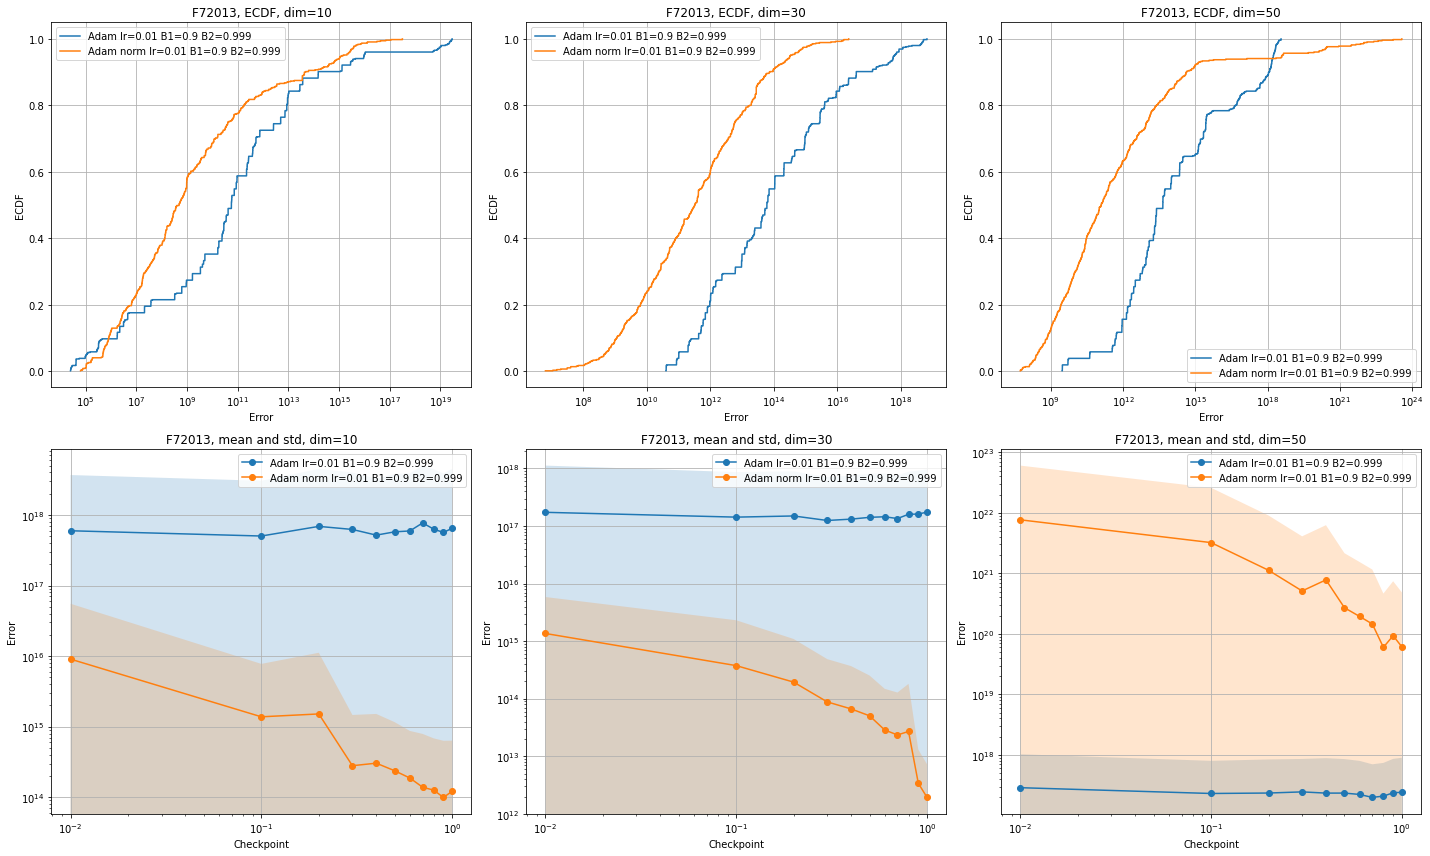

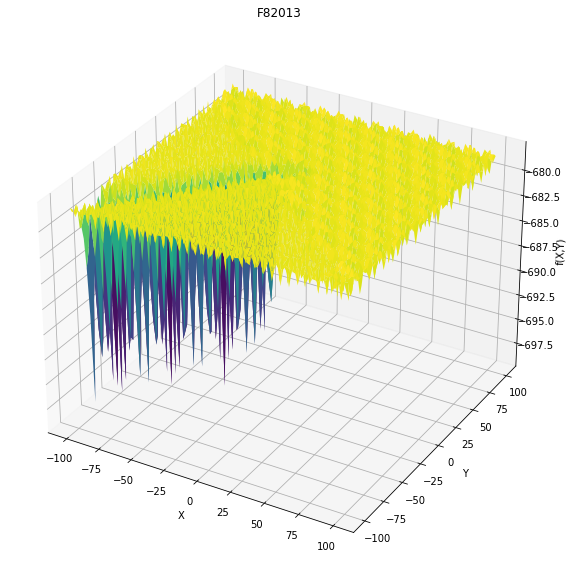

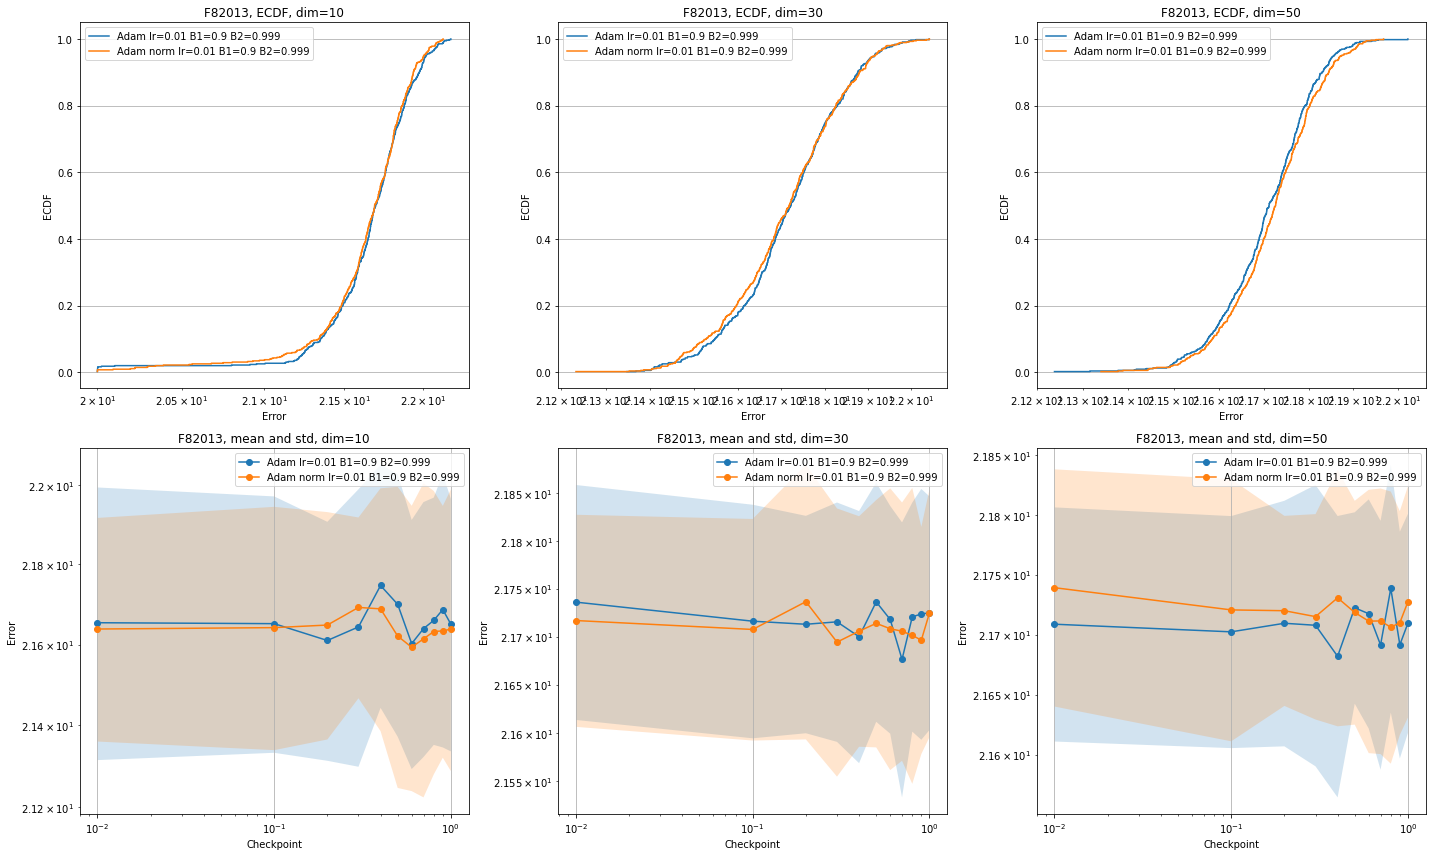

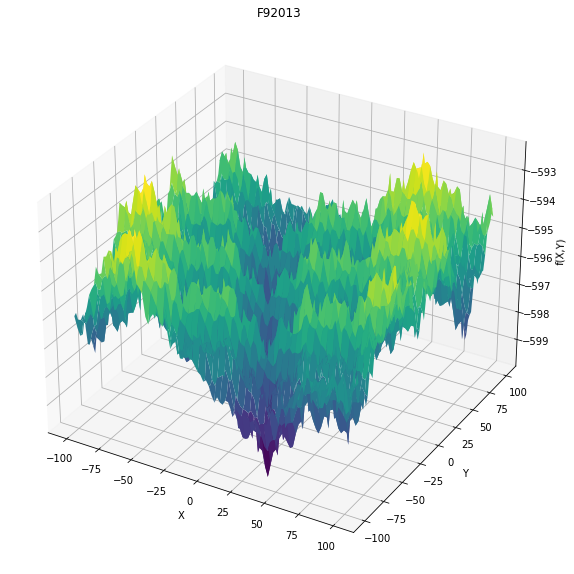

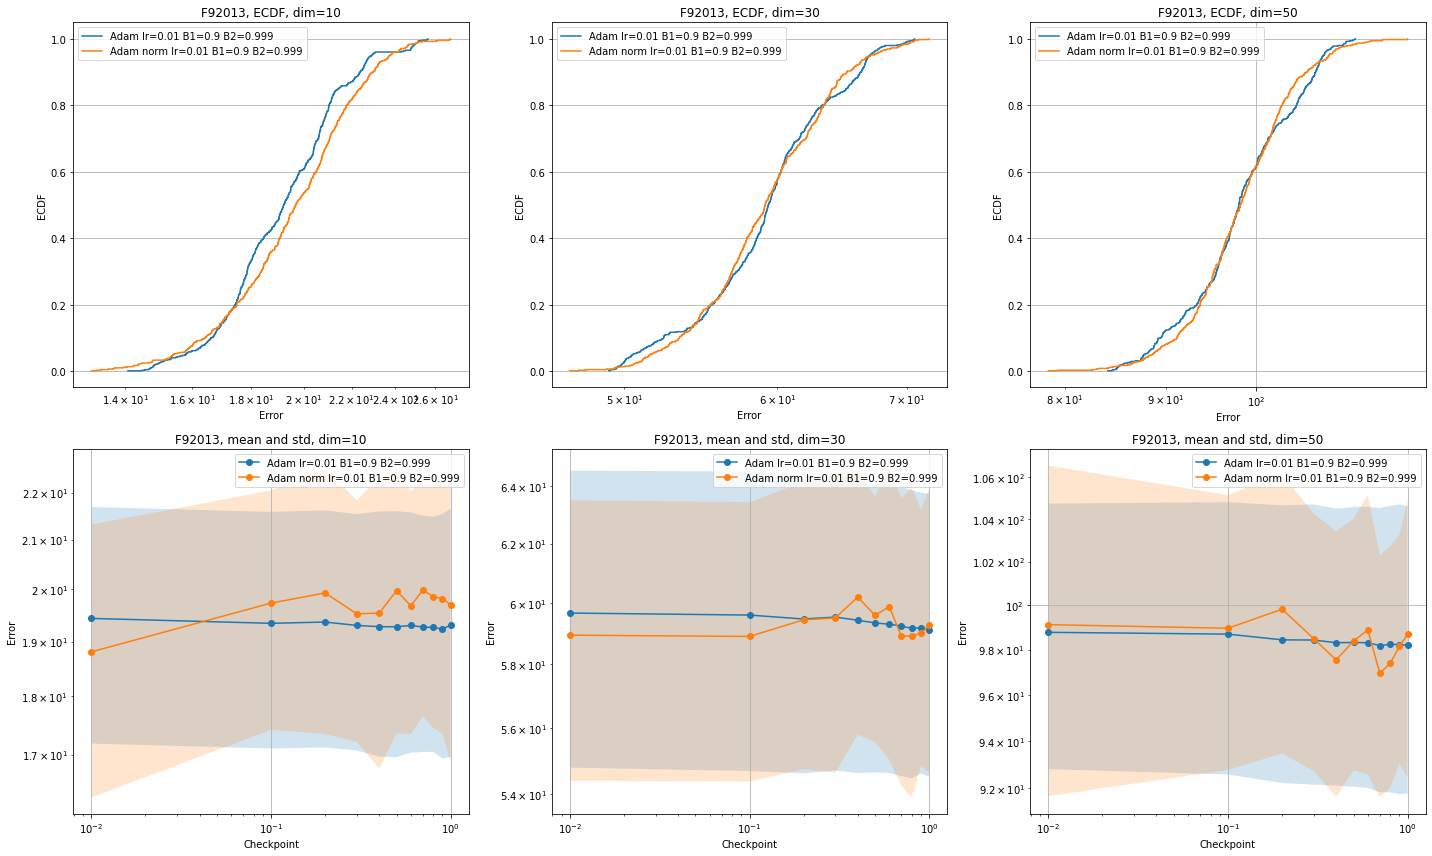

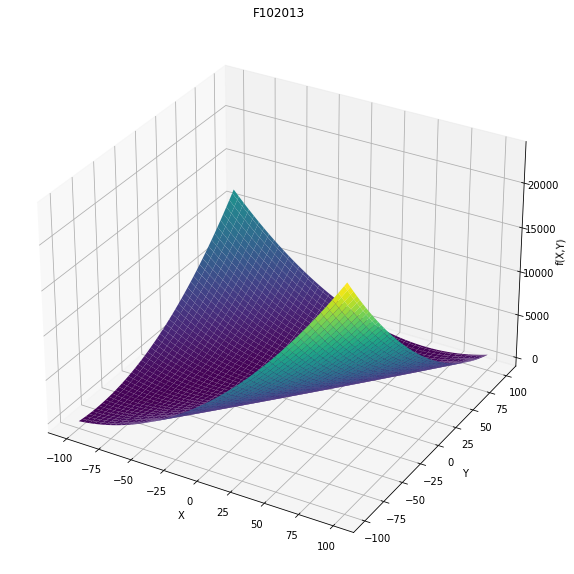

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/plgrid/plgmichalbrz/take_1/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


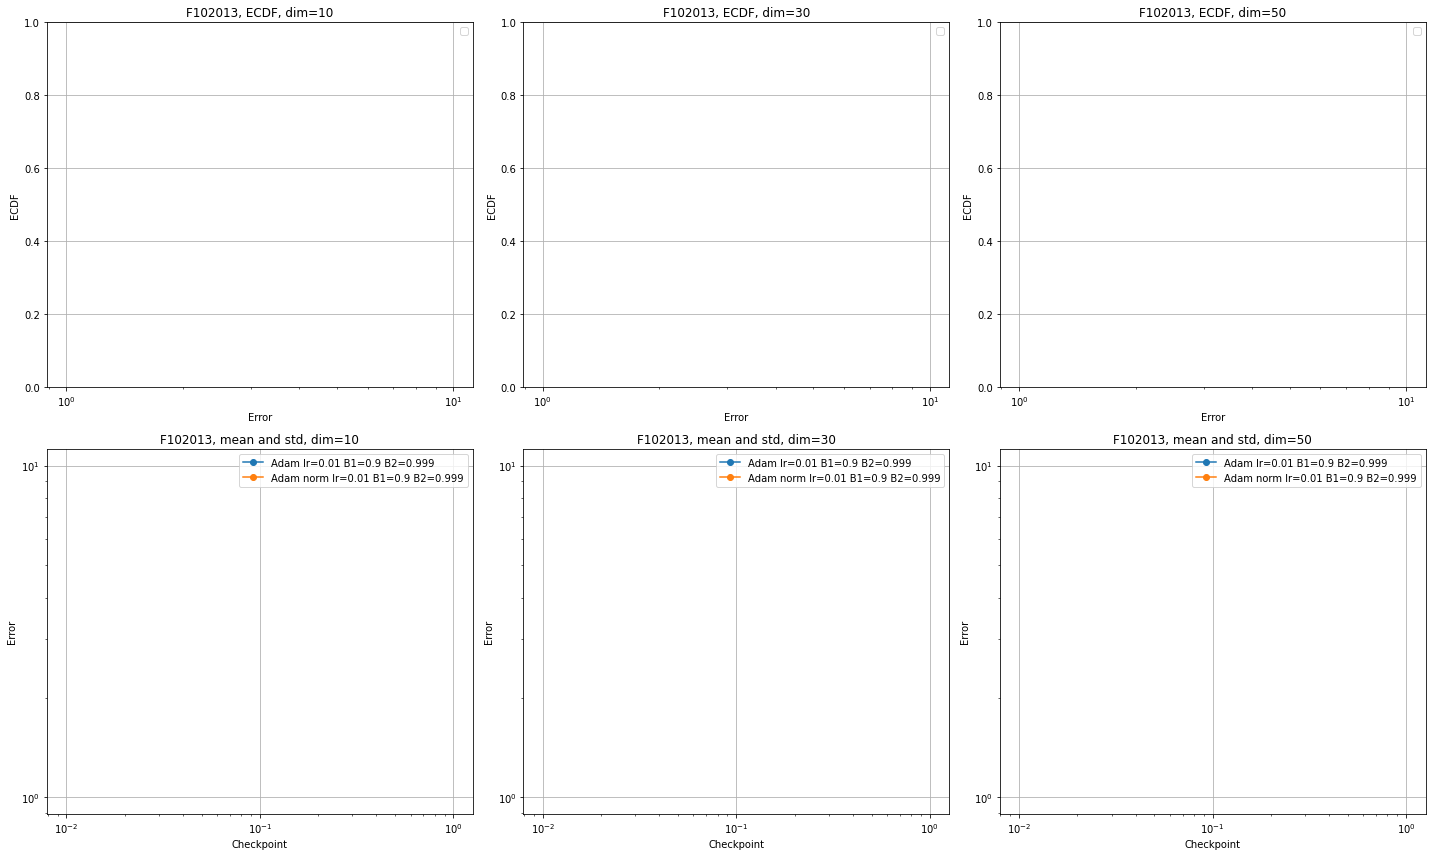

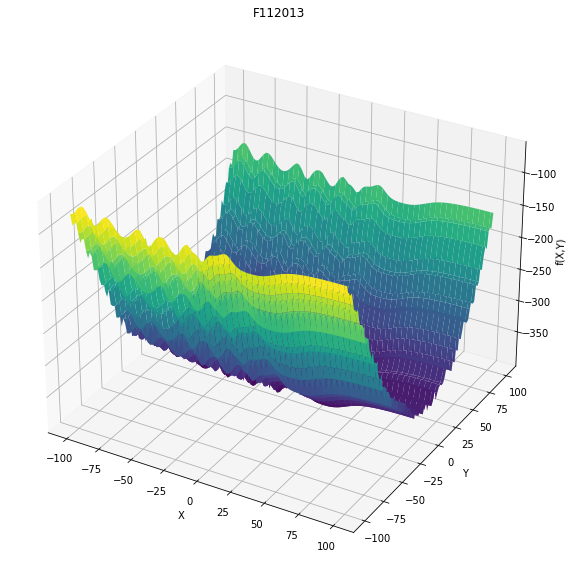

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


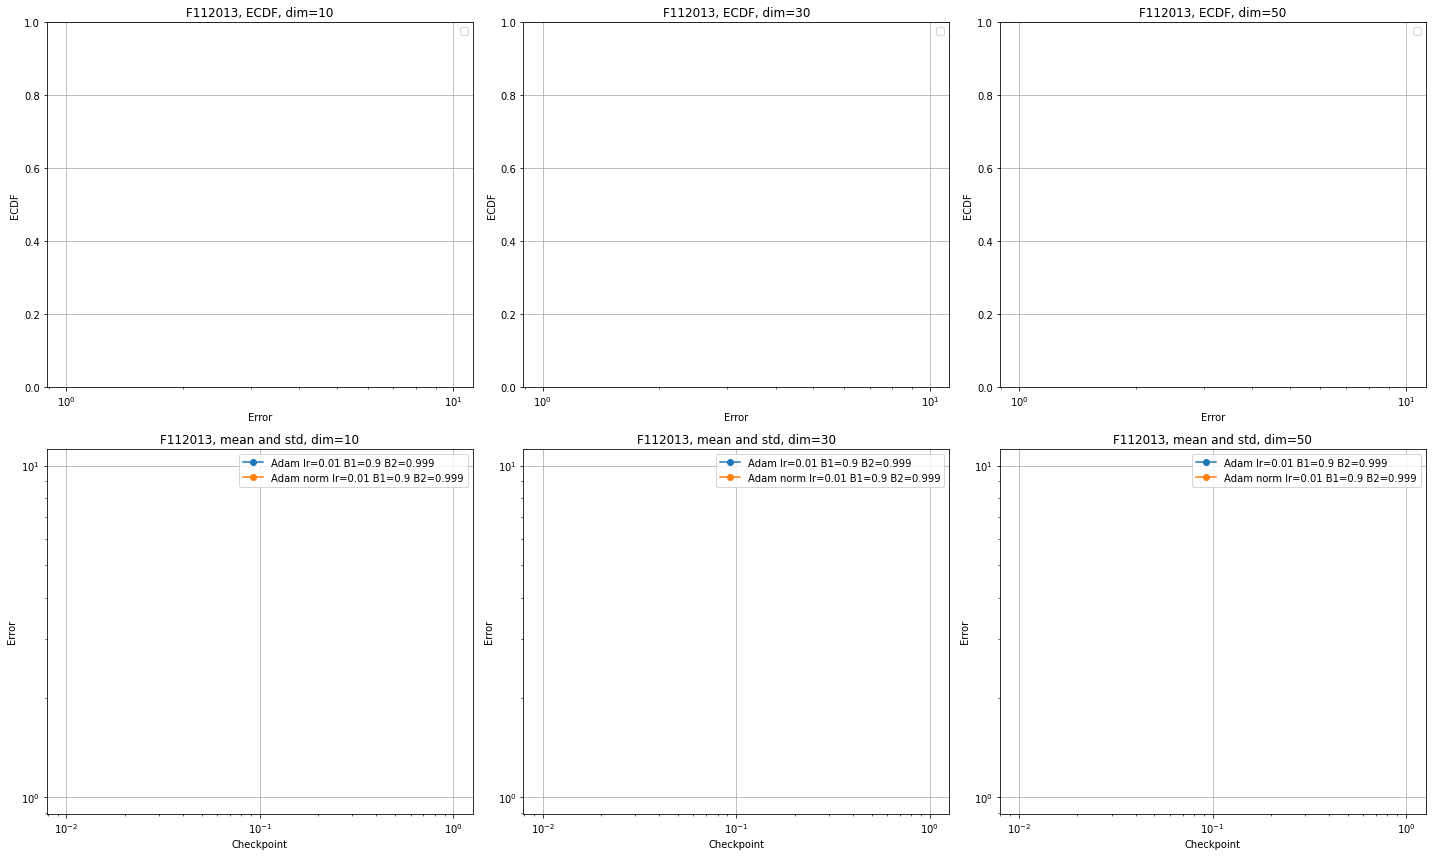

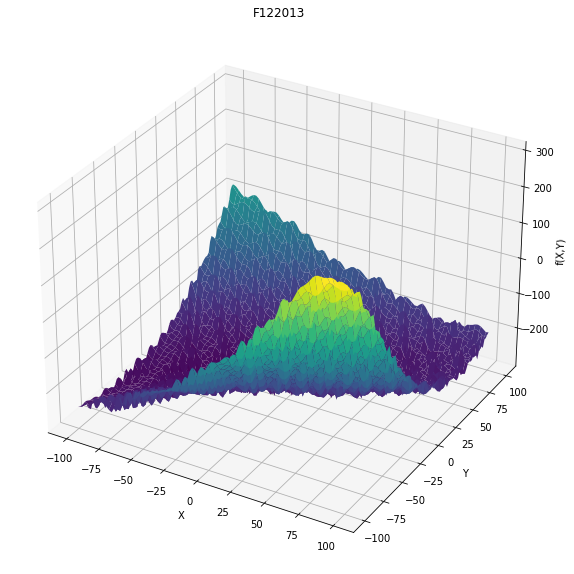

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


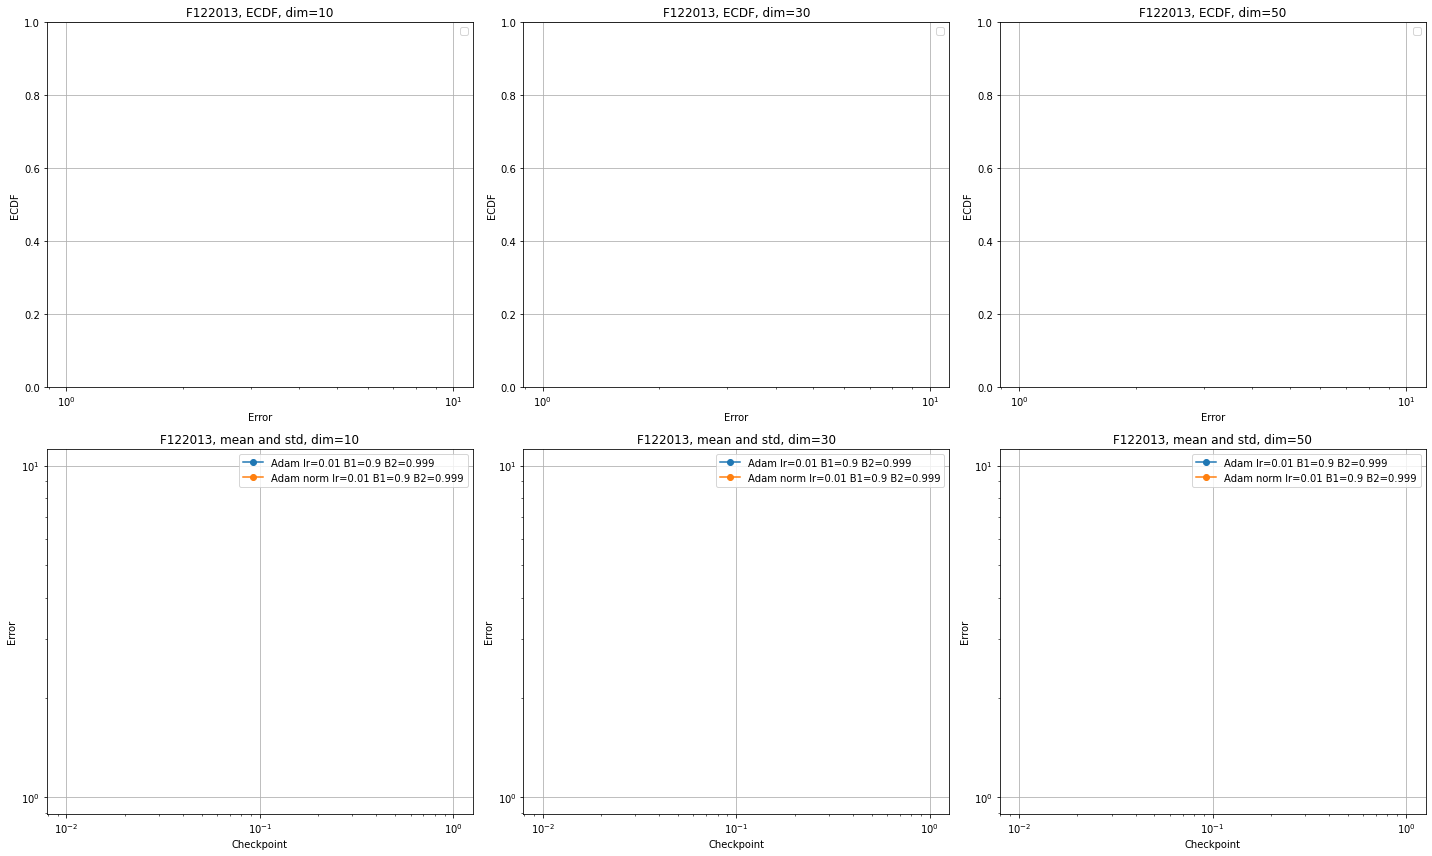

KeyboardInterrupt: 

In [21]:
to_compare = logs[2:4]

compare(to_compare)